                                         Assignment 3                                   Gr.No:21920026
Aim: Build a Data model in Python for the dataset chosen in Assignment 1 or 2 and apply Linear Regression/Logistic 
     Regression .Infer the result using  accuracy score 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import warnings
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [6]:
hpy_df = pd.read_csv('/home/pratiksha/Documents/data science/assignment 3/world-happiness-report-2019.csv')
hpy_df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [7]:
#cleaning data
#Filling missing value
hpy_df['Positive affect'].fillna(hpy_df['Positive affect'].mean(),inplace=True)
hpy_df['Negative affect'].fillna(hpy_df['Negative affect'].mean(),inplace=True)
hpy_df['Social support'].fillna(hpy_df['Social support'].mode(),inplace=True)
hpy_df['Freedom'].fillna(hpy_df['Freedom'].median(),inplace=True)
hpy_df['Corruption'].fillna(hpy_df['Corruption'].mean(),inplace=True)
hpy_df['Generosity'].fillna(hpy_df['Generosity'].median(),inplace=True)
hpy_df['Log of GDP\nper capita'].fillna(hpy_df['Log of GDP\nper capita'].mean(),inplace=True)
hpy_df['Healthy life\nexpectancy'].fillna(hpy_df['Healthy life\nexpectancy'].mean(),inplace=True)

hpy_df=hpy_df.drop('Country (region)',axis=1)  #Name of country  does not play any role
hpy_df.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Liner Regression

In [8]:
X= hpy_df.iloc[:,:-1].values
y= hpy_df.iloc[:,:11].values

Splitting the data into test and train


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 9), (32, 9), (124, 10), (32, 10))

In [10]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
Y_pred = linear_reg.predict(X_test)
value_log= round(linear_reg.score(X_train, y_train) * 100, 2)
value_log


97.52

Vizualizing the test and Predicted Results

Text(0, 0.5, 'Predicted y')

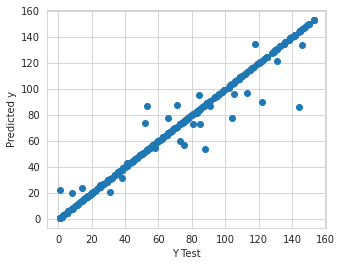

In [11]:
plt.scatter(y_test, Y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

Evaluating the Results

In [12]:
# Evaluating the data
from sklearn import metrics
print("Mean Absolute Error= ", metrics.mean_absolute_error(y_test, Y_pred))
print("Mean Squared Error= ", metrics.mean_squared_error(y_test, Y_pred))
print("Root Mean Squared Error= ", np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
acc=round(metrics.r2_score(y_test,Y_pred)*100,2)
print("Accuracy= ",acc)

Mean Absolute Error=  1.3612989669497302
Mean Squared Error=  33.98002936016782
Root Mean Squared Error=  5.8292391750697465
Accuracy=  97.78


Logistic Regression for Healthy life\nexpectancy

In [13]:
X = hpy_df.iloc[:, 2:10]
y = hpy_df['Healthy life\nexpectancy']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((109, 8), (47, 8), (109,), (47,))

In [15]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)


In [16]:
clf = LogisticRegression()
clf.fit(X_train, training_scores_encoded)
print("LogisticRegression")
y_pred = clf.predict(X_test)
y_pred

acc=round(metrics.r2_score(y_test,y_pred)*100,2)
print(acc)

LogisticRegression
41.78


In [17]:
print("Mean Absolute Error= ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error= ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error= ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc1=round(metrics.r2_score(y_test,y_pred)*100,2)
print("Accuracy= ",acc1)

Mean Absolute Error=  26.829787234042552
Mean Squared Error=  1123.3297872340424
Root Mean Squared Error=  33.51611235262888
Accuracy=  41.78


Text(0, 0.5, 'Predicted y')

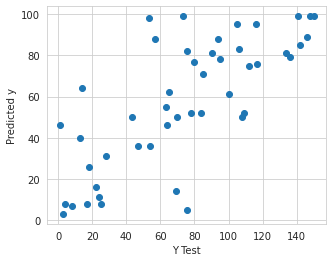

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

In [19]:
hpy_df = pd.read_csv('/home/pratiksha/Documents/data science/assignment 4/world-happiness-report-2019.csv')
hpy_df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [20]:
hpy_df.rename(columns={'SD of Ladder':'Ranking'}, inplace = True)
hpy_df.fillna(0, inplace = True)
hpy_df.head()

,Country (region),Ladder,Ranking,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [21]:
attributes = ['Negative affect','Social support','Log of GDP\nper capita','Healthy life\nexpectancy','Positive affect',
         'Freedom','Corruption','Generosity']
X = hpy_df[attributes]
y = hpy_df.Ranking

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(124, 8) (124,)
(32, 8) (32,)


In [23]:
lr =linear_model.LinearRegression()
lr= lr.fit(X_train,y_train)
predicted = cross_val_predict(lr, X_train, y_train, cv=10)
value_log= round(lr.score(X_train, y_train) * 100, 2)
value_log

59.8

In [24]:
ranking_predict = lr.predict(X_test)
print('Root Squared:',r2_score(y_test,ranking_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,ranking_predict)))
print('score:', lr.score(X_train, y_train)*100) 

Root Squared: 0.5332873046688127
Root Mean Squared Error: 30.832605311590594
score: 59.7986864065365


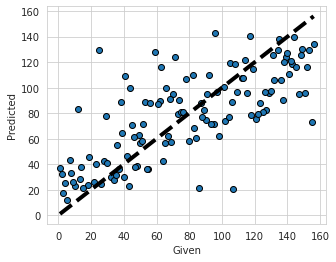

In [25]:
fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Given')
ax.set_ylabel('Predicted')
plt.show()

Logistic Regression

In [26]:
attributes = ['Negative affect','Social support','Log of GDP\nper capita','Healthy life\nexpectancy',
              'Positive affect', 'Freedom','Corruption','Generosity']
X = hpy_df[attributes]
y = hpy_df.Ranking 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(124, 8) (124,)
(32, 8) (32,)


In [27]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
Y_predict = logistic_regression.predict(X_test)
value_log= round(logistic_regression.score(X_train, y_train) * 100, 2)
value_log

100.0

In [28]:
ranking_predict = logistic_regression.predict(X_test)
print('Root Squared:',r2_score(y_test,ranking_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,ranking_predict)))
print('score:', logistic_regression.score(X_train, y_train)*100) 

Root Squared: -0.5883172725478696
Root Mean Squared Error: 52.822817039608935
score: 100.0
